# 1 Dense Layer

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, explained_variance_score

import keras

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv1D,MaxPooling1D
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
dps1200 = pd.read_csv("dps1200.csv")

In [3]:
features = dps1200.iloc[:, 4:].values
labels = dps1200.iloc[:, 0].values

In [4]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

In [5]:
## The model
## Hyperparameters for the network
DENSE = 512      # Number of neurons in the DENSE (a.k.a Fully connected) layer
DROPOUT = 0.5  # Dropout rate
C1_K  = 3       # Number of kernels/filters for conv. first layer
C1_S  = 40      # Width of the filters for first conv. layer
C2_K  = 3       # Number of kernels/filters for second conv. layer
C2_S  = 40 
input_dim = train_data.shape[1]
def make_model1():
    """ This functions outputs the CNN model already compiled """
    model = keras.Sequential()
    model.add(keras.layers.Input((input_dim, 1)))
    model.add(keras.layers.GaussianNoise(0.0001))
    
    model.add(keras.layers.Conv1D(C1_K, (C1_S), padding='valid', activation='relu'))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1, activation='relu'))

    ## Compile options for the model
    model.compile(loss=tf.keras.losses.Huber(), optimizer=keras.optimizers.Adam(learning_rate=0.004), metrics=['mean_absolute_error'])
    return model

model_cnn1 = make_model1()

In [6]:
print(model_cnn1.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gaussian_noise (GaussianNoise)  │ (None, 410, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 371, 3)         │           123 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1113)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,114 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,237 (4.83 KB)

 Trainable params: 1,237 (4.83 KB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
cnn = model_cnn1.fit(train_data, train_labels, epochs=1000, batch_size=45, validation_split=0.2)

Epoch 1/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1728.3230 - mean_absolute_error: 1729.0406 - val_loss: 1742.3031 - val_mean_absolute_error: 1742.0493
Epoch 2/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1728.9233 - mean_absolute_error: 1729.8319 - val_loss: 1718.1455 - val_mean_absolute_error: 1717.8870
Epoch 3/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1702.8242 - mean_absolute_error: 1703.4708 - val_loss: 1664.0664 - val_mean_absolute_error: 1663.8048
Epoch 4/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1634.7515 - mean_absolute_error: 1635.1409 - val_loss: 1573.9365 - val_mean_absolute_error: 1573.6790
Epoch 5/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1541.2766 - mean_absolute_error: 1542.1176 - val_loss: 1445.0005 - val_mean_absolute_error: 1444.7576
Epoch 6/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1396.8779 - mean_absolute_error: 1397.6614 - val_loss: 1276.2574 - val_mean_absolute_error: 1276.0433
Epoch 7/1000
19/19 ━━━━━━━━

In [8]:
print(model_cnn1.evaluate(test_data, test_labels, verbose=False))

[132.51576232910156, 111.40848541259766]


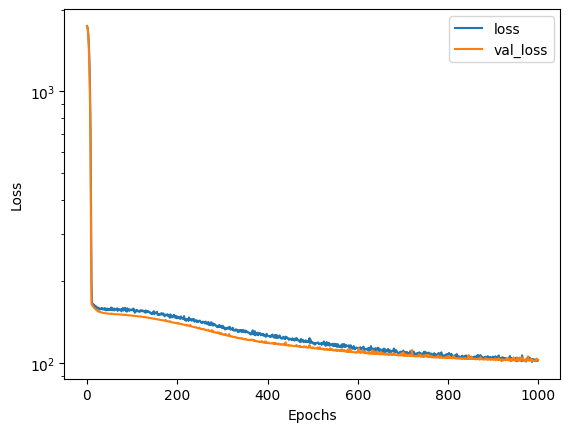

In [9]:
plt.plot(cnn.history['loss'], label='loss')
plt.plot(cnn.history['val_loss'], label='val_loss')

plt.yscale('log')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

In [10]:
predicted = model_cnn1.predict(train_data)
predicted_test = model_cnn1.predict(test_data)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [11]:
## Compute error metrics
def error_metrices(y_true_train, y_predicted_train, y_true_test, y_predicted_test):
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_predicted_train))
    rmse_test = np.sqrt(mean_squared_error(y_true_test, y_predicted_test))
    R2_train= r2_score(y_true_train, y_predicted_train)
    R2_test= r2_score(y_true_test, y_predicted_test)

    print('\n\n*********** Benchmark results ***********\n')
    print(f"R2    (Train/Test) = {R2_train:.3f} / {R2_test:.3f}")
    print(f"RMSE  (Train/Test) = {rmse_train:.3f} / {rmse_test:.3f}")
    

error_metrices(train_labels, predicted, test_labels, predicted_test)



*********** Benchmark results ***********

R2    (Train/Test) = 0.482 / 0.437
RMSE  (Train/Test) = 140.506 / 150.652


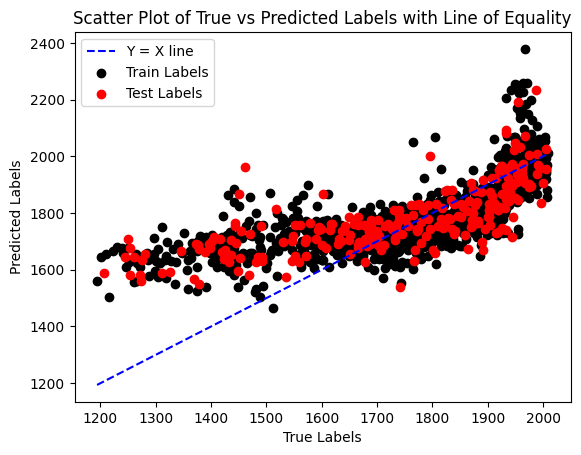

In [12]:
x_values = np.linspace(min(labels), max(labels), 100)

# Plot the line of equality (y=x)
plt.plot(x_values, x_values, color='blue', linestyle='--', label='Y = X line')

# Scatter plot for predicted values
plt.scatter(train_labels, predicted[:, 0], c='k', label='Train Labels')
plt.scatter(test_labels, predicted_test[:, 0], c='r', label='Test Labels')

# Labels, legend, and title
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.legend()
plt.title('Scatter Plot of True vs Predicted Labels with Line of Equality')

# Show the plot
plt.show()